In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cupy as cp

# Define la ruta a la carpeta en tu Drive donde están tus módulos
# Asegúrate de CAMBIAR 'mis_modulos' por el nombre real de tu carpeta
module_path1 = '/kaggle/input/mi-mlp/other/default/1'
module_path2 = '/kaggle/input/emnist-bymerge'



sys.path.append(module_path1)
sys.path.append(module_path2)

from metrics import *
from models import *


In [2]:
# Cargar los archivos .npy
X_images = np.load('/kaggle/input/emnist-bymerge/X_images.npy')
y_images = np.load('/kaggle/input/emnist-bymerge/y_images.npy')

print(f"X_images shape: {X_images.shape}")
print(f"y_images shape: {y_images.shape}")

X_images shape: (809555, 28, 28)
y_images shape: (809555,)


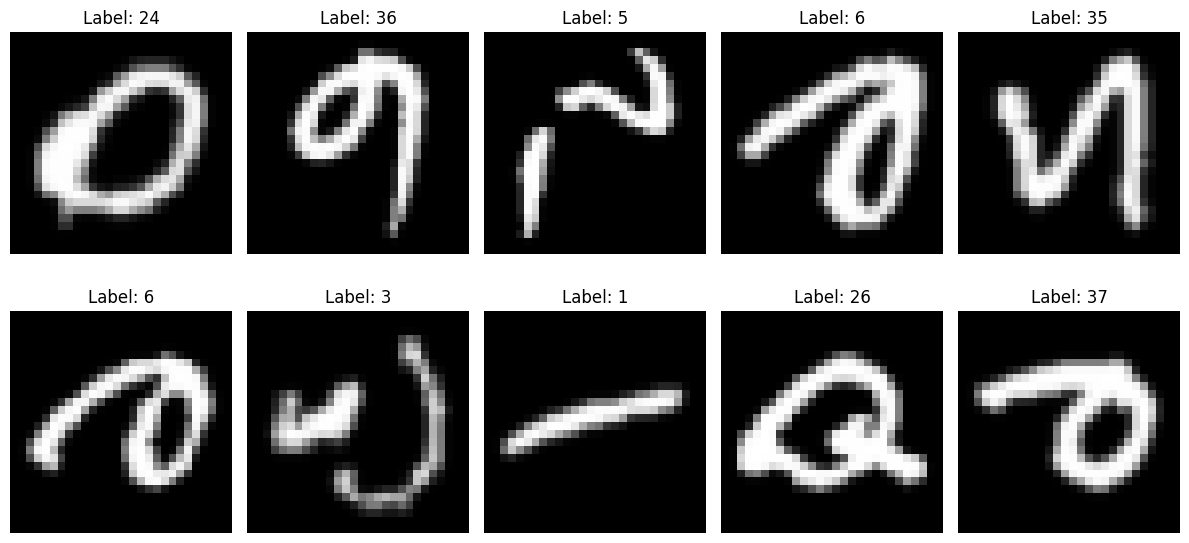

In [3]:
fig, axes = plt.subplots(2, 5, figsize=(12, 6))
axes = axes.ravel()

for i in range(10):
    axes[i].imshow(X_images[i], cmap='gray')
    axes[i].set_title(f'Label: {y_images[i]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

Valores únicos: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46]
Cantidad de clases: 47

Primeros 20 valores: [24 36  5  6 35  6  3  1 26 37 39  5  3  7 38 14 28  6 36 46]

=== Distribución de clases ===
Clase 0: 40263 imágenes (4.97%)
Clase 1: 44604 imágenes (5.51%)
Clase 2: 39972 imágenes (4.94%)
Clase 3: 41012 imágenes (5.07%)
Clase 4: 39054 imágenes (4.82%)
Clase 5: 36506 imágenes (4.51%)
Clase 6: 39837 imágenes (4.92%)
Clase 7: 41793 imágenes (5.16%)
Clase 8: 39479 imágenes (4.88%)
Clase 9: 39433 imágenes (4.87%)
Clase 10: 7369 imágenes (0.91%)
Clase 11: 4426 imágenes (0.55%)
Clase 12: 15019 imágenes (1.86%)
Clase 13: 5241 imágenes (0.65%)
Clase 14: 5685 imágenes (0.70%)
Clase 15: 10522 imágenes (1.30%)
Clase 16: 2864 imágenes (0.35%)
Clase 17: 3573 imágenes (0.44%)
Clase 18: 17046 imágenes (2.11%)
Clase 19: 6501 imágenes (0.80%)
Clase 20: 5707 imágenes (0.70%)
Clase 21: 23639 imágenes (

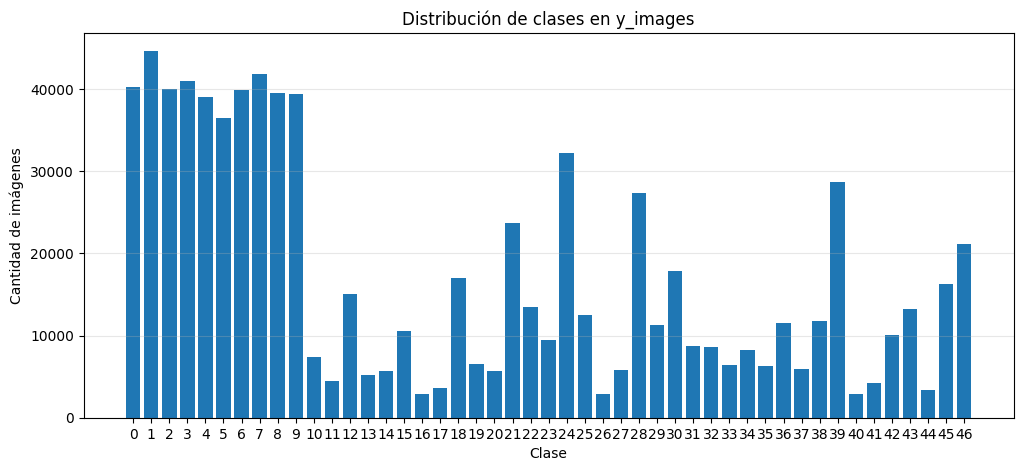

In [4]:

print(f"Valores únicos: {np.unique(y_images)}")
print(f"Cantidad de clases: {len(np.unique(y_images))}")
print(f"\nPrimeros 20 valores: {y_images[:20]}")

unique, counts = np.unique(y_images, return_counts=True)
print("\n=== Distribución de clases ===")
for label, count in zip(unique, counts):
    print(f"Clase {label}: {count} imágenes ({count/len(y_images)*100:.2f}%)")

# Visualizar la distribución
plt.figure(figsize=(12, 5))
plt.bar(unique, counts)
plt.xlabel('Clase')
plt.ylabel('Cantidad de imágenes')
plt.title('Distribución de clases en y_images')
plt.xticks(unique)
plt.grid(axis='y', alpha=0.3)
plt.show()

# 1. Análisis y Preprocesamiento de Datos

## 1.a) Visualización de imágenes del dataset

=== Visualización de 3 imágenes del dataset ===

Imagen 0: Shape (28, 28), Min=0, Max=255, Clase=24
Imagen 1: Shape (28, 28), Min=0, Max=255, Clase=36
Imagen 2: Shape (28, 28), Min=0, Max=255, Clase=5


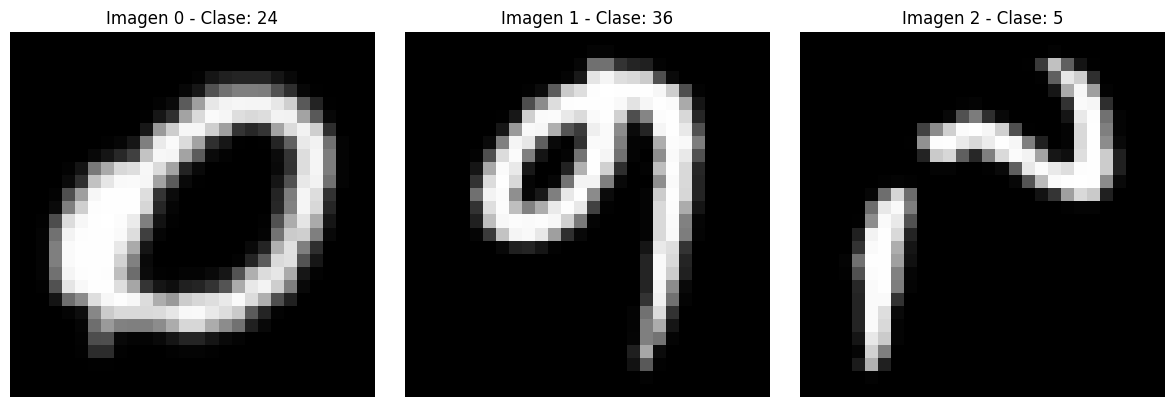

In [5]:
# Visualizar al menos 3 imágenes como pide el ejercicio
print("=== Visualización de 3 imágenes del dataset ===\n")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

for i in range(3):
    img = X_images[i].reshape(28, 28)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(f'Imagen {i} - Clase: {y_images[i]}')
    axes[i].axis('off')
    print(f"Imagen {i}: Shape {img.shape}, Min={img.min()}, Max={img.max()}, Clase={y_images[i]}")

plt.tight_layout()
plt.show()

## 1.b) División del dataset en Train, Validation y Test

In [6]:
# División del dataset
# Proporciones: 70% Train, 15% Validation, 15% Test

np.random.seed(42)  # Para reproducibilidad

# Obtener índices aleatorios
n_samples = X_images.shape[0]
indices = np.random.permutation(n_samples)

# Calcular tamaños
train_size = int(0.7 * n_samples)
val_size = int(0.15 * n_samples)
test_size = n_samples - train_size - val_size

# Dividir índices
train_indices = indices[:train_size]
val_indices = indices[train_size:train_size + val_size]
test_indices = indices[train_size + val_size:]

# Crear subconjuntos
X_train = X_images[train_indices]
y_train = y_images[train_indices]

X_val = X_images[val_indices]
y_val = y_images[val_indices]

X_test = X_images[test_indices]
y_test = y_images[test_indices]

print("=== División del dataset ===")
print(f"Train: {X_train.shape[0]} muestras ({X_train.shape[0]/n_samples*100:.1f}%)")
print(f"Validation: {X_val.shape[0]} muestras ({X_val.shape[0]/n_samples*100:.1f}%)")
print(f"Test: {X_test.shape[0]} muestras ({X_test.shape[0]/n_samples*100:.1f}%)")
print(f"Total: {n_samples} muestras")

=== División del dataset ===
Train: 566688 muestras (70.0%)
Validation: 121433 muestras (15.0%)
Test: 121434 muestras (15.0%)
Total: 809555 muestras


## 1.c) Normalización de los datos

In [7]:
# Normalizar dividiendo por 255 para que el máximo sea 1
print("=== Antes de la normalización ===")
print(f"X_train - Min: {X_train.min()}, Max: {X_train.max()}")
print(f"X_val - Min: {X_val.min()}, Max: {X_val.max()}")
print(f"X_test - Min: {X_test.min()}, Max: {X_test.max()}")

X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

print("\n=== Después de la normalización ===")
print(f"X_train - Min: {X_train.min():.4f}, Max: {X_train.max():.4f}")
print(f"X_val - Min: {X_val.min():.4f}, Max: {X_val.max():.4f}")
print(f"X_test - Min: {X_test.min():.4f}, Max: {X_test.max():.4f}")

# Reshape para que sean vectores (flatten) - necesario para MLP
# De (n_samples, 28, 28) a (n_samples, 784)
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("\n=== Después del reshape para MLP ===")
print(f"X_train_flat shape: {X_train_flat.shape}")
print(f"X_val_flat shape: {X_val_flat.shape}")
print(f"X_test_flat shape: {X_test_flat.shape}")

# Transponer para que tenga formato (features, samples) como espera nuestro MLP
X_train_T = X_train_flat.T
X_val_T = X_val_flat.T
X_test_T = X_test_flat.T

print("\n=== Transposición para formato (features, samples) ===")
print(f"X_train_T shape: {X_train_T.shape} - (features={X_train_T.shape[0]}, samples={X_train_T.shape[1]})")
print(f"X_val_T shape: {X_val_T.shape}")
print(f"X_test_T shape: {X_test_T.shape}")

=== Antes de la normalización ===
X_train - Min: 0, Max: 255
X_val - Min: 0, Max: 255
X_test - Min: 0, Max: 255

=== Después de la normalización ===
X_train - Min: 0.0000, Max: 1.0000
X_val - Min: 0.0000, Max: 1.0000
X_test - Min: 0.0000, Max: 1.0000

=== Después del reshape para MLP ===
X_train_flat shape: (566688, 784)
X_val_flat shape: (121433, 784)
X_test_flat shape: (121434, 784)

=== Transposición para formato (features, samples) ===
X_train_T shape: (784, 566688) - (features=784, samples=566688)
X_val_T shape: (784, 121433)
X_test_T shape: (784, 121434)


In [8]:
# Convertir labels a one-hot encoding para cross-entropy
def to_one_hot(y, n_classes):
    """Convierte labels a formato one-hot encoding"""
    one_hot = np.zeros((n_classes, y.shape[0]))
    one_hot[y, np.arange(y.shape[0])] = 1
    return one_hot

n_classes = len(np.unique(y_images))
print(f"Número de clases: {n_classes}")

y_train_onehot = to_one_hot(y_train, n_classes)
y_val_onehot = to_one_hot(y_val, n_classes)
y_test_onehot = to_one_hot(y_test, n_classes)

print(f"\ny_train_onehot shape: {y_train_onehot.shape} - (classes={y_train_onehot.shape[0]}, samples={y_train_onehot.shape[1]})")
print(f"y_val_onehot shape: {y_val_onehot.shape}")
print(f"y_test_onehot shape: {y_test_onehot.shape}")

# Verificar que la codificación one-hot está correcta
print("\n=== Verificación de one-hot encoding ===")
print(f"Ejemplo - y_train[0] = {y_train[0]}")
print(f"One-hot correspondiente (primeras 10 posiciones): {y_train_onehot[:10, 0]}")

Número de clases: 47

y_train_onehot shape: (47, 566688) - (classes=47, samples=566688)
y_val_onehot shape: (47, 121433)
y_test_onehot shape: (47, 121434)

=== Verificación de one-hot encoding ===
Ejemplo - y_train[0] = 4
One-hot correspondiente (primeras 10 posiciones): [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


# 2. Entrenamiento del Modelo MLP con Batch Training

In [9]:
input_size = 784 
n_classes = 47  

L = 2                  
M = [128, 64]          
batch_size = 64     
learning_rate = 0.01   
epochs = 30            
init_method = 'glorot' 

layer_sizes = [input_size] + M + [n_classes]

mlp = MLP(n_layers=L+1, layer_sizes=layer_sizes, batch_size=batch_size, init=init_method)

## 2.c) Entrenamiento del Modelo M0

In [10]:
print("--- Convirtiendo datos a float32 ---")
X_train_T = X_train_T.astype(np.float32)
y_train_onehot = y_train_onehot.astype(np.float32)
X_val_T = X_val_T.astype(np.float32)
y_val_onehot = y_val_onehot.astype(np.float32)
X_test_T = X_test_T.astype(np.float32) # También para el futuro
y_test_onehot = y_test_onehot.astype(np.float32) # También para el futuro

# Verificar (opcional)
print(f"X_train_T dtype: {X_train_T.dtype}")
print(f"y_train_onehot dtype: {y_train_onehot.dtype}")

--- Convirtiendo datos a float32 ---
X_train_T dtype: float32
y_train_onehot dtype: float32


In [11]:
print("=== Iniciando entrenamiento del modelo M0 ===\n")
print(f"Arquitectura: {layer_sizes}")
print(f"Datos de entrenamiento: {X_train_T.shape[1]} muestras")
print(f"Datos de validación: {X_val_T.shape[1]} muestras")
print(f"Batch size: {batch_size}")
print(f"Learning rate: {learning_rate}")
print(f"Épocas: {epochs}\n")

import time
start_time = time.time()

history_M0 = mlp.train(
    X_train_T,  
    y_train_onehot,  
    X_val=X_val_T, 
    y_val=y_val_onehot,
    epochs=epochs, 
    learning_rate=learning_rate,
    verbose=True
)

end_time = time.time()
training_time = end_time - start_time

print(f"\n=== Entrenamiento completado ===")
print(f"Tiempo total: {training_time:.2f} segundos ({training_time/60:.2f} minutos)")
print(f"Tiempo por época: {training_time/epochs:.2f} segundos")

import cupy as cp
train_losses = [float(cp.asnumpy(loss)) if isinstance(loss, cp.ndarray) else float(loss) 
                for loss in history_M0['train_loss']]
val_losses = [float(cp.asnumpy(loss)) if isinstance(loss, cp.ndarray) else float(loss) 
              for loss in history_M0['val_loss']]

print(f"\nLoss final - Train: {train_losses[-1]:.4f}, Validation: {val_losses[-1]:.4f}")

=== Iniciando entrenamiento del modelo M0 ===

Arquitectura: [784, 128, 64, 47]
Datos de entrenamiento: 566688 muestras
Datos de validación: 121433 muestras
Batch size: 64
Learning rate: 0.01
Épocas: 30

Epoch 0/30 - LR: 0.010000 - Train Loss: 1.2410 - Val Loss: 0.8088
Epoch 10/30 - LR: 0.010000 - Train Loss: 0.4085 - Val Loss: 0.4037
Epoch 20/30 - LR: 0.010000 - Train Loss: 0.3606 - Val Loss: 0.3766

Training completed. Best validation loss: 0.3608

=== Entrenamiento completado ===
Tiempo total: 522.93 segundos (8.72 minutos)
Tiempo por época: 17.43 segundos

Loss final - Train: 0.3398, Validation: 0.3612


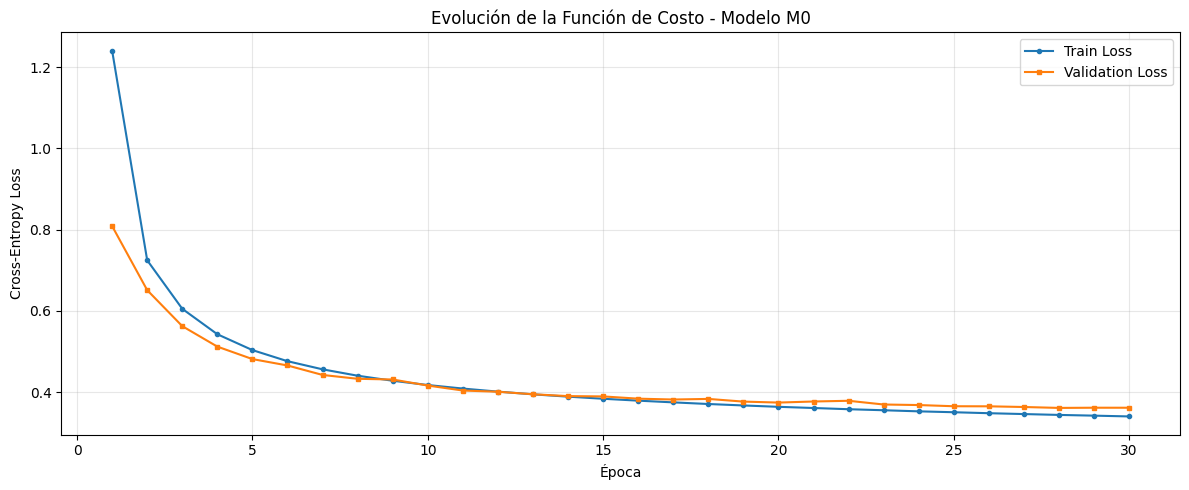

=== Análisis de Convergencia ===
Mejor loss de validación: 0.3608 en época 28
Diferencia train-val al final: 0.0214
✓ Gap train-val aceptable (0.0214)


In [12]:
# Graficar la evolución de la función de costo
plt.figure(figsize=(12, 5))

plt.plot(range(1, epochs+1), train_losses, label='Train Loss', marker='o', markersize=3)
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss', marker='s', markersize=3)
plt.xlabel('Época')
plt.ylabel('Cross-Entropy Loss')
plt.title('Evolución de la Función de Costo - Modelo M0')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Análisis de convergencia
print("=== Análisis de Convergencia ===")
print(f"Mejor loss de validación: {min(val_losses):.4f} en época {val_losses.index(min(val_losses))+1}")
print(f"Diferencia train-val al final: {abs(train_losses[-1] - val_losses[-1]):.4f}")

# Detectar posible overfitting
if train_losses[-1] < val_losses[-1]:
    gap = val_losses[-1] - train_losses[-1]
    if gap > 0.1:
        print(f"⚠️ Posible overfitting detectado (gap: {gap:.4f})")
    else:
        print(f"✓ Gap train-val aceptable ({gap:.4f})")
else:
    print("✓ No hay evidencia de overfitting")


Cross-Entropy Final (Train): 0.3398
Cross-Entropy Final (Validation): 0.3612

=== Métricas en Entrenamiento (TRAIN) para M0 ===
metricas
Accuracy: 0.8820 (88.20%)
F1-Score Macro: 0.8515
Precision promedio: 0.8744
Recall promedio: 0.8425

=== Métricas en Validación (VAL) para M0 ===
metricas
Accuracy: 0.8759 (87.59%)
F1-Score Macro: 0.8413
Precision promedio: 0.8644
Recall promedio: 0.8310


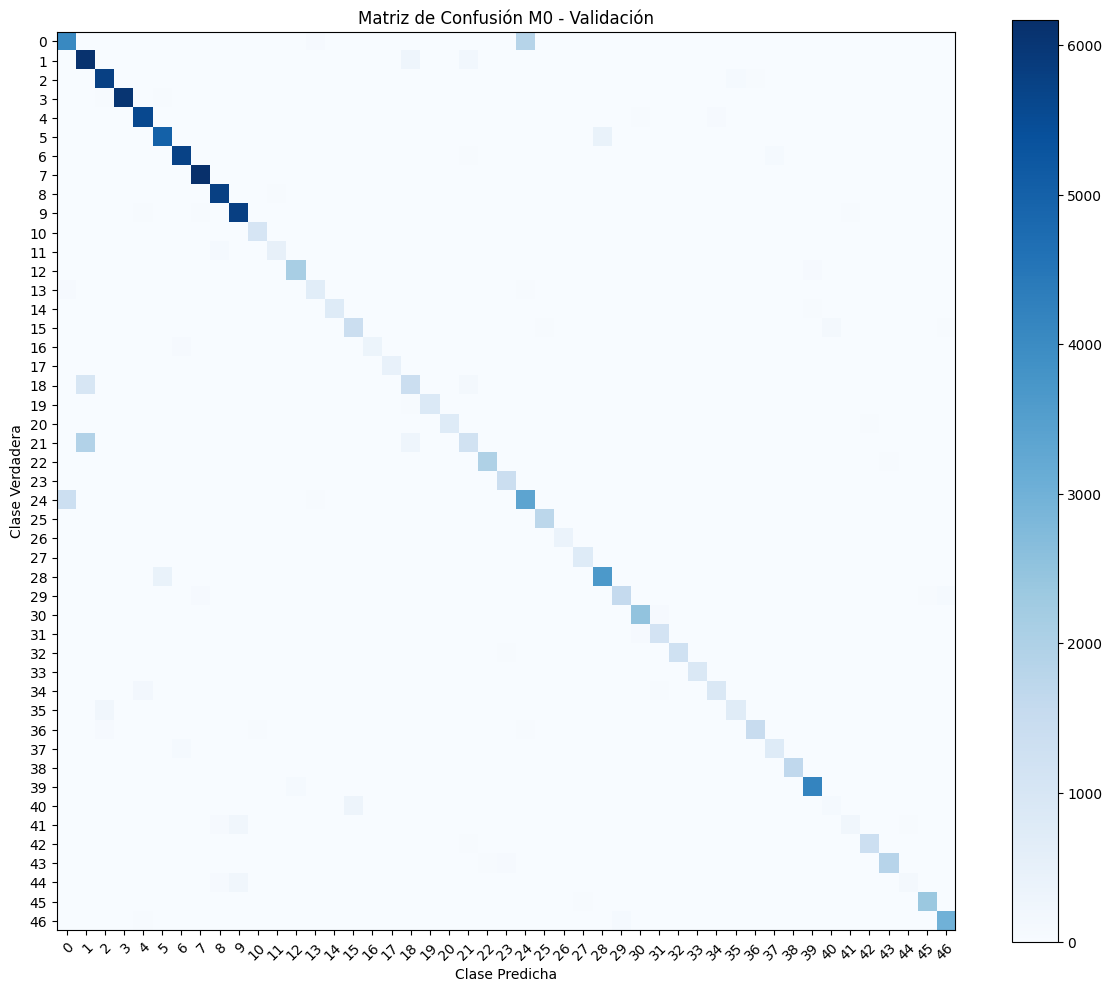

In [13]:



y_pred_train_M0 = mlp.predict(cp.asarray(X_train_T))
y_pred_train_cpu = cp.asnumpy(y_pred_train_M0)

y_pred_val_M0 = mlp.predict(cp.asarray(X_val_T))
y_pred_val_cpu = cp.asnumpy(y_pred_val_M0)

# --- Métricas y Reporte ---

# Reportar Loss (el valor final se toma del entrenamiento en la celda 12)
# Reemplazar con los valores reales si ya ejecutaste la celda 12 y tienes el output
train_loss_final = history_M0['train_loss'][-1]
val_loss_final = history_M0['val_loss'][-1]

print(f"\nCross-Entropy Final (Train): {train_loss_final:.4f}")
print(f"Cross-Entropy Final (Validation): {val_loss_final:.4f}")

print("\n=== Métricas en Entrenamiento (TRAIN) para M0 ===")
metrics_M0_train = evaluate_model(y_train, y_pred_train_cpu, n_classes=n_classes, verbose=True)

print("\n=== Métricas en Validación (VAL) para M0 ===")
metrics_M0_val = evaluate_model(y_val, y_pred_val_cpu, n_classes=n_classes, verbose=True)

plot_confusion_matrix(metrics_M0_val['confusion_matrix'], title='Matriz de Confusión M0 - Validación')
plt.show()



# 3. Modelos Avanzados - Optimizaciones

FALTA REPORTAR TIEMPO DE ENTRENAMIENTO

HAY INCONCISTENCIAS EN LOS HIPERPARAMETROS DE CADA MODELO


In [14]:
# ----------------------------------------------------------------------------
# 1. Modelo Base M0 - SGD sin optimizaciones
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("1. MODELO M0 - Baseline (SGD sin optimizaciones)")
print("="*80)
model_m0 = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=64, optimizer='sgd')
history_m0 = model_m0.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot, 
                            epochs=50, learning_rate=0.01, verbose=True)



1. MODELO M0 - Baseline (SGD sin optimizaciones)
Epoch 0/50 - LR: 0.010000 - Train Loss: 3.0595 - Val Loss: 1.8898
Epoch 10/50 - LR: 0.010000 - Train Loss: 0.4563 - Val Loss: 0.4519
Epoch 20/50 - LR: 0.010000 - Train Loss: 0.3799 - Val Loss: 0.3876
Epoch 30/50 - LR: 0.010000 - Train Loss: 0.3501 - Val Loss: 0.3645
Epoch 40/50 - LR: 0.010000 - Train Loss: 0.3328 - Val Loss: 0.3531

Training completed. Best validation loss: 0.3520


In [15]:

# ----------------------------------------------------------------------------
# 2. Learning Rate Scheduling Lineal
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("2. LEARNING RATE SCHEDULING LINEAL")
print("="*80)
print("Decay lineal: LR va de 0.01 a 0.001 en 100 épocas (entrenamos 50)\n")
model_linear = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                   batch_size=64, optimizer='sgd')
history_linear = model_linear.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                    epochs=50, learning_rate=0.01,
                                    lr_schedule='linear',
                                    lr_schedule_params={'final_lr': 0.001, 'total_epochs': 100},
                                    verbose=True)



2. LEARNING RATE SCHEDULING LINEAL
Decay lineal: LR va de 0.01 a 0.001 en 100 épocas (entrenamos 50)

Epoch 0/50 - LR: 0.010000 - Train Loss: 2.9487 - Val Loss: 1.7586
Epoch 10/50 - LR: 0.009100 - Train Loss: 0.4560 - Val Loss: 0.4511
Epoch 20/50 - LR: 0.008200 - Train Loss: 0.3836 - Val Loss: 0.3876
Epoch 30/50 - LR: 0.007300 - Train Loss: 0.3556 - Val Loss: 0.3696
Epoch 40/50 - LR: 0.006400 - Train Loss: 0.3393 - Val Loss: 0.3572

Training completed. Best validation loss: 0.3524


In [16]:
# ----------------------------------------------------------------------------
# 3. Learning Rate Scheduling Exponencial
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("3. LEARNING RATE SCHEDULING EXPONENCIAL")
print("="*80)
print("Decay exponencial: LR se multiplica por 0.96 en cada época\n")
model_exp = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                batch_size=64, optimizer='sgd')
history_exp = model_exp.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                              epochs=50, learning_rate=0.01,
                              lr_schedule='exponential',
                              lr_schedule_params={'decay_rate': 0.96},
                              verbose=True)



3. LEARNING RATE SCHEDULING EXPONENCIAL
Decay exponencial: LR se multiplica por 0.96 en cada época

Epoch 0/50 - LR: 0.010000 - Train Loss: 2.9838 - Val Loss: 1.7981
Epoch 10/50 - LR: 0.006648 - Train Loss: 0.4734 - Val Loss: 0.4669
Epoch 20/50 - LR: 0.004420 - Train Loss: 0.4037 - Val Loss: 0.4088
Epoch 30/50 - LR: 0.002939 - Train Loss: 0.3799 - Val Loss: 0.3887
Epoch 40/50 - LR: 0.001954 - Train Loss: 0.3678 - Val Loss: 0.3802

Training completed. Best validation loss: 0.3761


In [17]:
# ----------------------------------------------------------------------------
# 4. Optimizador Adam
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("4. OPTIMIZADOR ADAM")
print("="*80)
model_adam = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                 batch_size=64, optimizer='adam')
history_adam = model_adam.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                epochs=50, learning_rate=0.01, verbose=True)



4. OPTIMIZADOR ADAM
Epoch 0/50 - LR: 0.010000 - Train Loss: 0.8009 - Val Loss: 0.6920
Epoch 10/50 - LR: 0.010000 - Train Loss: 0.6989 - Val Loss: 0.6882
Epoch 20/50 - LR: 0.010000 - Train Loss: 0.6882 - Val Loss: 0.6907
Epoch 30/50 - LR: 0.010000 - Train Loss: 0.6956 - Val Loss: 0.7282
Epoch 40/50 - LR: 0.010000 - Train Loss: 0.7125 - Val Loss: 0.7837

Training completed. Best validation loss: 0.6860


In [18]:
# ----------------------------------------------------------------------------
# 5. Regularización L2
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("5. REGULARIZACIÓN L2")
print("="*80)
print("Lambda = 0.01\n")
model_l2 = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=64, optimizer='sgd')
history_l2 = model_l2.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                            epochs=50, learning_rate=0.01,
                            lambda_reg=0.01, verbose=True)



5. REGULARIZACIÓN L2
Lambda = 0.01

Epoch 0/50 - LR: 0.010000 - Train Loss: 2.9734 - Val Loss: 1.8599
Epoch 10/50 - LR: 0.010000 - Train Loss: 0.4904 - Val Loss: 0.4841
Epoch 20/50 - LR: 0.010000 - Train Loss: 0.4268 - Val Loss: 0.4367
Epoch 30/50 - LR: 0.010000 - Train Loss: 0.4031 - Val Loss: 0.4205
Epoch 40/50 - LR: 0.010000 - Train Loss: 0.3902 - Val Loss: 0.4071

Training completed. Best validation loss: 0.4009


In [19]:

# ----------------------------------------------------------------------------
# 6. Early Stopping
# ----------------------------------------------------------------------------
print("\n" + "="*80)
print("6. EARLY STOPPING")
print("="*80)
print("Patience = 15 épocas\n")
model_es = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=64, optimizer='sgd')
history_es = model_es.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                            epochs=50, learning_rate=0.01,
                            early_stopping_patience=15, verbose=True)



6. EARLY STOPPING
Patience = 15 épocas

Epoch 0/50 - LR: 0.010000 - Train Loss: 2.9416 - Val Loss: 1.7614
Epoch 10/50 - LR: 0.010000 - Train Loss: 0.4551 - Val Loss: 0.4496
Epoch 20/50 - LR: 0.010000 - Train Loss: 0.3817 - Val Loss: 0.3861
Epoch 30/50 - LR: 0.010000 - Train Loss: 0.3506 - Val Loss: 0.3671
Epoch 40/50 - LR: 0.010000 - Train Loss: 0.3326 - Val Loss: 0.3556

Training completed. Best validation loss: 0.3503


In [21]:
print("\n" + "="*80)
print("7. MODELO M1 - Combinación de TODAS las optimizaciones")
print("="*80)
print("Adam + LR Exponencial + L2 Regularization + Early Stopping\n")
model_m1 = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
               batch_size=256, optimizer='adam')
history_m1 = model_m1.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                            epochs=50, learning_rate=0.001,
                            lr_schedule='exponential',
                            lr_schedule_params={'decay_rate': 0.95},
                            lambda_reg=0.001,
                            early_stopping_patience=20, verbose=True)


7. MODELO M1 - Combinación de TODAS las optimizaciones
Adam + LR Exponencial + L2 Regularization + Early Stopping

Epoch 0/50 - LR: 0.001000 - Train Loss: 0.9498 - Val Loss: 0.5516
Epoch 10/50 - LR: 0.000599 - Train Loss: 0.3506 - Val Loss: 0.3696
Epoch 20/50 - LR: 0.000358 - Train Loss: 0.3206 - Val Loss: 0.3535
Epoch 30/50 - LR: 0.000215 - Train Loss: 0.3059 - Val Loss: 0.3492
Epoch 40/50 - LR: 0.000129 - Train Loss: 0.2980 - Val Loss: 0.3488

Training completed. Best validation loss: 0.3474


## Comparación de Modelos - Tabla de Métricas

In [22]:
# ============================================================================
# EVALUACIÓN Y COMPARACIÓN DE TODOS LOS MODELOS
# ============================================================================

def evaluate_model_metrics(model, X_val, y_val_onehot, y_val_true, history, model_name):
    """
    Evalúa un modelo y retorna sus métricas principales
    """
    # Hacer predicciones (transferir a GPU solo para predicción)
    y_pred = model.predict(cp.asarray(X_val))
    y_pred_cpu = cp.asnumpy(y_pred)
    
    # Calcular métricas
    acc = accuracy(y_val_true, y_pred_cpu)
    f1_macro, _ = f1_score_macro(y_val_true, y_pred_cpu, n_classes=47)
    precision, recall = precision_recall_per_class(y_val_true, y_pred_cpu, n_classes=47)
    
    # Obtener loss final
    final_train_loss = history['train_loss'][-1]
    final_val_loss = history['val_loss'][-1]
    
    # Calcular número de épocas reales (puede ser menor si hubo early stopping)
    num_epochs = len(history['train_loss'])
    
    return {
        'Modelo': model_name,
        'Train Loss': f"{final_train_loss:.4f}",
        'Val Loss': f"{final_val_loss:.4f}",
        'Accuracy': f"{acc:.4f}",
        'F1-Score': f"{f1_macro:.4f}",
        'Precision': f"{np.mean(precision):.4f}",
        'Recall': f"{np.mean(recall):.4f}",
        'Épocas': num_epochs
    }

# Lista para almacenar las métricas de todos los modelos
models_metrics = []

# Evaluar cada modelo
print("="*80)
print("EVALUANDO TODOS LOS MODELOS EN CONJUNTO DE VALIDACIÓN")
print("="*80 + "\n")

# IMPORTANTE: Usar los modelos correctos creados en la celda anterior
models_to_evaluate = [
    (model_m0, history_m0, "M0 - Baseline (SGD)"),
    (model_linear, history_linear, "LR Scheduling Lineal"),
    (model_exp, history_exp, "LR Scheduling Exponencial"),
    (model_adam, history_adam, "Adam"),
    (model_l2, history_l2, "L2 Regularization"),
    (model_es, history_es, "Early Stopping"),
    (model_m1, history_m1, "M1 - Completo (Adam+LR+L2+ES)")
]

for model, history, name in models_to_evaluate:
    print(f"Evaluando: {name}...")
    metrics = evaluate_model_metrics(model, X_val_T, y_val_onehot, y_val, history, name)
    models_metrics.append(metrics)

# Crear DataFrame con las métricas
metrics_df = pd.DataFrame(models_metrics)

print("\n" + "="*100)
print("TABLA COMPARATIVA DE MODELOS")
print("="*100)
print(metrics_df.to_string(index=False))
print("="*100)

EVALUANDO TODOS LOS MODELOS EN CONJUNTO DE VALIDACIÓN

Evaluando: M0 - Baseline (SGD)...
Evaluando: LR Scheduling Lineal...
Evaluando: LR Scheduling Exponencial...
Evaluando: Adam...
Evaluando: L2 Regularization...
Evaluando: Early Stopping...
Evaluando: M1 - Completo (Adam+LR+L2+ES)...

TABLA COMPARATIVA DE MODELOS
                       Modelo Train Loss Val Loss Accuracy F1-Score Precision Recall  Épocas
          M0 - Baseline (SGD)     0.3220   0.3559   0.8789   0.8439    0.8614 0.8380      50
         LR Scheduling Lineal     0.3289   0.3539   0.8781   0.8416    0.8639 0.8325      50
    LR Scheduling Exponencial     0.3614   0.3761   0.8724   0.8321    0.8537 0.8239      50
                         Adam     0.7237   0.7783   0.8021   0.7173    0.7574 0.7025      50
            L2 Regularization     0.3825   0.4009   0.8795   0.8421    0.8659 0.8325      50
               Early Stopping     0.3213   0.3503   0.8791   0.8422    0.8638 0.8356      50
M1 - Completo (Adam+LR+L2+ES)  

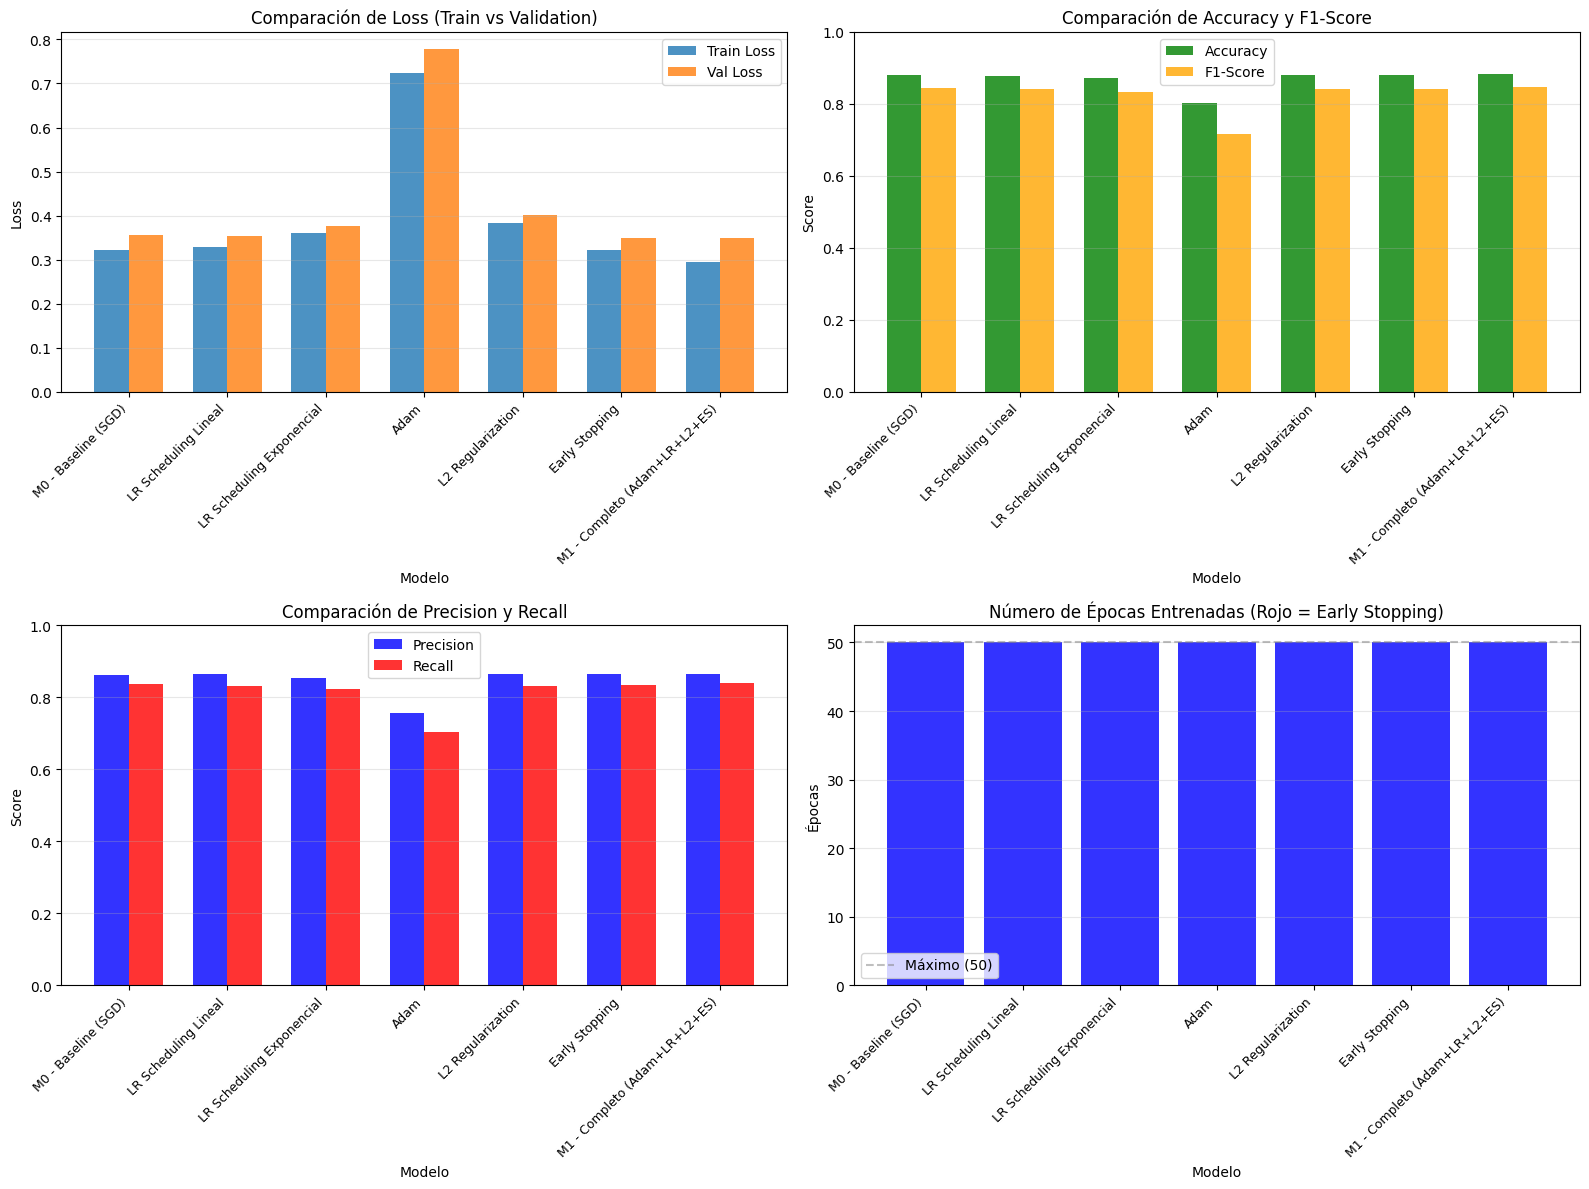


MEJORES MODELOS POR MÉTRICA
Mejor Accuracy: M1 - Completo (Adam+LR+L2+ES) (0.8817)
Mejor F1-Score: M1 - Completo (Adam+LR+L2+ES) (0.8467)
Menor Val Loss: M1 - Completo (Adam+LR+L2+ES) (0.3488)
Mejor Precision: L2 Regularization (0.8659)
Mejor Recall: M1 - Completo (Adam+LR+L2+ES) (0.8394)


In [23]:
# Visualización gráfica de la comparación de modelos
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Convertir columnas numéricas de string a float para graficar
metrics_df_plot = metrics_df.copy()
for col in ['Train Loss', 'Val Loss', 'Accuracy', 'F1-Score', 'Precision', 'Recall']:
    metrics_df_plot[col] = metrics_df_plot[col].astype(float)

# 1. Comparación de Losses
ax = axes[0, 0]
x = np.arange(len(metrics_df_plot))
width = 0.35
ax.bar(x - width/2, metrics_df_plot['Train Loss'], width, label='Train Loss', alpha=0.8)
ax.bar(x + width/2, metrics_df_plot['Val Loss'], width, label='Val Loss', alpha=0.8)
ax.set_xlabel('Modelo')
ax.set_ylabel('Loss')
ax.set_title('Comparación de Loss (Train vs Validation)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_plot['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# 2. Comparación de Accuracy y F1-Score
ax = axes[0, 1]
x = np.arange(len(metrics_df_plot))
width = 0.35
ax.bar(x - width/2, metrics_df_plot['Accuracy'], width, label='Accuracy', alpha=0.8, color='green')
ax.bar(x + width/2, metrics_df_plot['F1-Score'], width, label='F1-Score', alpha=0.8, color='orange')
ax.set_xlabel('Modelo')
ax.set_ylabel('Score')
ax.set_title('Comparación de Accuracy y F1-Score')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_plot['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# 3. Comparación de Precision y Recall
ax = axes[1, 0]
x = np.arange(len(metrics_df_plot))
width = 0.35
ax.bar(x - width/2, metrics_df_plot['Precision'], width, label='Precision', alpha=0.8, color='blue')
ax.bar(x + width/2, metrics_df_plot['Recall'], width, label='Recall', alpha=0.8, color='red')
ax.set_xlabel('Modelo')
ax.set_ylabel('Score')
ax.set_title('Comparación de Precision y Recall')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_plot['Modelo'], rotation=45, ha='right', fontsize=9)
ax.legend()
ax.grid(axis='y', alpha=0.3)
ax.set_ylim([0, 1])

# 4. Número de épocas entrenadas
ax = axes[1, 1]
colors = ['red' if e < 50 else 'blue' for e in metrics_df_plot['Épocas']]
ax.bar(x, metrics_df_plot['Épocas'], alpha=0.8, color=colors)
ax.set_xlabel('Modelo')
ax.set_ylabel('Épocas')
ax.set_title('Número de Épocas Entrenadas (Rojo = Early Stopping)')
ax.set_xticks(x)
ax.set_xticklabels(metrics_df_plot['Modelo'], rotation=45, ha='right', fontsize=9)
ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5, label='Máximo (50)')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Identificar el mejor modelo según diferentes métricas
print("\n" + "="*100)
print("MEJORES MODELOS POR MÉTRICA")
print("="*100)
print(f"Mejor Accuracy: {metrics_df_plot.loc[metrics_df_plot['Accuracy'].idxmax(), 'Modelo']} ({metrics_df_plot['Accuracy'].max():.4f})")
print(f"Mejor F1-Score: {metrics_df_plot.loc[metrics_df_plot['F1-Score'].idxmax(), 'Modelo']} ({metrics_df_plot['F1-Score'].max():.4f})")
print(f"Menor Val Loss: {metrics_df_plot.loc[metrics_df_plot['Val Loss'].idxmin(), 'Modelo']} ({metrics_df_plot['Val Loss'].min():.4f})")
print(f"Mejor Precision: {metrics_df_plot.loc[metrics_df_plot['Precision'].idxmax(), 'Modelo']} ({metrics_df_plot['Precision'].max():.4f})")
print(f"Mejor Recall: {metrics_df_plot.loc[metrics_df_plot['Recall'].idxmax(), 'Modelo']} ({metrics_df_plot['Recall'].max():.4f})")
print("="*100)

### B

veo unicamente con el modelo comleto y vario un h a la vez

In [ ]:
# Definición de hiperparámetros base de M1 (para mantener consistencia)
BASE_LR = 0.001
BASE_DECAY = 0.95
BASE_PATIENCE = 20
BATCH_SIZE_EXP = 128

# M1 - Base (para referencia, aunque ya entrenado)
model_m1_base = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                    batch_size=BATCH_SIZE_EXP, optimizer='adam')
print("\n" + "="*80)
print("1A. M1 L2 - BASE (Lambda=0.001)")
print("="*80)
history_m1_base = model_m1_base.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                      epochs=50, learning_rate=BASE_LR,
                                      lr_schedule='exponential', lr_schedule_params={'decay_rate': BASE_DECAY},
                                      lambda_reg=0.001, 
                                      early_stopping_patience=BASE_PATIENCE, verbose=True)

# M1 - Lambda Bajo
model_l2_low = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                   batch_size=BATCH_SIZE_EXP, optimizer='adam')
print("\n" + "="*80)
print("1B. M1 L2 - Lambda BAJO (Lambda=0.0001)")
print("="*80)
history_l2_low = model_l2_low.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                    epochs=50, learning_rate=BASE_LR,
                                    lr_schedule='exponential', lr_schedule_params={'decay_rate': BASE_DECAY},
                                    lambda_reg=0.0001, # VARIACIÓN
                                    early_stopping_patience=BASE_PATIENCE, verbose=True)

# M1 - Lambda Alto
model_l2_high = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                    batch_size=BATCH_SIZE_EXP, optimizer='adam')
print("\n" + "="*80)
print("1C. M1 L2 - Lambda ALTO (Lambda=0.01)")
print("="*80)
history_l2_high = model_l2_high.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                      epochs=50, learning_rate=BASE_LR,
                                      lr_schedule='exponential', lr_schedule_params={'decay_rate': BASE_DECAY},
                                      lambda_reg=0.01, # VARIACIÓN
                                      early_stopping_patience=BASE_PATIENCE, verbose=True)

# Limpieza de memoria (si es necesario)
# cp.get_default_memory_pool().free_all_blocks()

In [ ]:
# (Ajustar BEST_LAMBDA con el resultado del paso anterior)
BEST_LAMBDA = 0.001 # Supuesto: 0.001 resultó ser el mejor

# M1 - Decay Lento
model_decay_slow = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                       batch_size=BATCH_SIZE_EXP, optimizer='adam')
print("\n" + "="*80)
print("2A. M1 LR - Decay LENTO (Rate=0.98)")
print("="*80)
history_decay_slow = model_decay_slow.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                            epochs=50, learning_rate=BASE_LR,
                                            lr_schedule='exponential', lr_schedule_params={'decay_rate': 0.98}, # VARIACIÓN
                                            lambda_reg=BEST_LAMBDA,
                                            early_stopping_patience=BASE_PATIENCE, verbose=True)

# M1 - Decay Rápido
model_decay_fast = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                       batch_size=BATCH_SIZE_EXP, optimizer='adam')
print("\n" + "="*80)
print("2B. M1 LR - Decay RÁPIDO (Rate=0.90)")
print("="*80)
history_decay_fast = model_decay_fast.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                            epochs=50, learning_rate=BASE_LR,
                                            lr_schedule='exponential', lr_schedule_params={'decay_rate': 0.90}, # VARIACIÓN
                                            lambda_reg=BEST_LAMBDA,
                                            early_stopping_patience=BASE_PATIENCE, verbose=True)

# Limpieza de memoria
# cp.get_default_memory_pool().free_all_blocks()

In [ ]:
# (Ajustar BEST_DECAY_RATE con el resultado del paso anterior)
BEST_DECAY_RATE = 0.95 # Supuesto: 0.95 resultó ser el mejor

# M1 - Paciencia Corta
model_es_short = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                     batch_size=BATCH_SIZE_EXP, optimizer='adam')
print("\n" + "="*80)
print("3A. M1 ES - Paciencia CORTA (Patience=10)")
print("="*80)
history_es_short = model_es_short.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                        epochs=50, learning_rate=BASE_LR,
                                        lr_schedule='exponential', lr_schedule_params={'decay_rate': BEST_DECAY_RATE},
                                        lambda_reg=BEST_LAMBDA,
                                        early_stopping_patience=10, verbose=True) # VARIACIÓN

# M1 - Paciencia Larga
model_es_long = MLP(n_layers=3, layer_sizes=[784, 128, 64, 47], 
                    batch_size=BATCH_SIZE_EXP, optimizer='adam')
print("\n" + "="*80)
print("3B. M1 ES - Paciencia LARGA (Patience=30)")
print("="*80)
history_es_long = model_es_long.train(X_train_T, y_train_onehot, X_val_T, y_val_onehot,
                                      epochs=50, learning_rate=BASE_LR,
                                      lr_schedule='exponential', lr_schedule_params={'decay_rate': BEST_DECAY_RATE},
                                      lambda_reg=BEST_LAMBDA,
                                      early_stopping_patience=30, verbose=True) # VARIACIÓN

# Limpieza de memoria
# cp.get_default_memory_pool().free_all_blocks()